# Chapter 14 : 통계 분석을 이용한 가설 검정

## 가설 검정이란?

### 기술 통계와 추론 통계 

**기술통계**
* 데이터를 요약해 설명하는 통계 분석 기법 

**추론통계**
* 어떤 값이 발생할 확률을 계산하는 통계 분석 기법 

일반적으로 통계 분석을 수행했다는 것은, 추론 통계를 이용해 가설 검정을 했다는 의미입니다. 기술 통계 분석에서 집단 간 차이가 있는 것으로 나타났더라도 이는 우연에 의한 차이일 수 있습니다. 데이터를 이용해 신뢰할 수 있는 결론을 내리려면 유의확률을 계산하는 통계적 가설 검정 절차를 거쳐야 합니다. 

### 통계적 가설 검정 
유의확률을 이용해 가설을 검정하는 방법을 **통계적 가설 검정**이라고 합니다. 
**유의확률**은 실제로 집단 간 차이가 없는데 우연히 차이가 있는 데이터가 추출될 확률을 의미합니다. 

## t 검정 - 두 집단의 평균 비교하기 

**t검정**은 두 집단의 평균에 통계적으로 유의미한 차이가 있는지 알아볼 때 사용하는 통계 분석 기법입니다.

### compact 자동차와 suv 자동차의 도시 연비 t 검정 

In [2]:
import pandas as pd 
mpg = pd.read_csv("c:/data/do_it_python/mpg.csv")

# 기술 통계 분석
mpg.query('category in ["compact","suv"]')\
    .groupby('category',as_index = False)\
    .agg(n = ('category','count'),
        mean = ('cty','mean'))

,category,n,mean
0,compact,47,20.12766
1,suv,62,13.50000


In [3]:
# cty 추출해서 각 변수에 담기 
compact = mpg.query('category == "compact"')['cty']
suv = mpg.query('category == "suv"')['cty']

In [5]:
# t-test 
# 공분산이 동일하다는 가정하에 분석을 진행함 

from scipy import stats 
stats.ttest_ind(compact,suv,equal_var = True)

Ttest_indResult(statistic=11.917282584324107, pvalue=2.3909550904711282e-21)

*p-value*가 0.05보다 작으면 통계적으로 집단 간 차이가 유의미하다고 해석합니다. 
현재 *p-value*는 2.3909550904711282e-21로써, 이는 앞에 0이 21개 있는 값 보다 작다는 의미입니다. 이로써 **p-value가 0.05보다 작기 때문에 compact와 suv간 평균 도시 연비 차이가 통계적으로 유의하다**고 결론 내릴 수 있습니다.  

### 일반 휘발유와 고급 휘발유의 도시 연비 t 검정 

In [7]:
# 기술 통계 분석 
mpg.query('fl in ["r","p"]')\
    .groupby('fl', as_index = False)\
    .agg(n = ('fl','count'),
        mean = ('cty','mean'))

,fl,n,mean
0,p,52,17.365385
1,r,168,16.738095


In [8]:
regular = mpg.query('fl == "r"')['cty']
premium = mpg.query('fl == "p"')['cty']

# t-test 
stats.ttest_ind(regular, premium, equal_var = True)

Ttest_indResult(statistic=-1.066182514588919, pvalue=0.28752051088667036)

p-value가 0.29로 0.05보다 큽니다. 이는 실제로 차이가 없는데 우연에 의해 이런 정도의 차이가 관찰될 확률이 28.75%라는 의미입니다. 따라서 **일반 휘발유와 고급 휘발유를 사용하는 자동차의 도시 연비 차이가 통계적으로 유의하지 않다**고 결론내릴 수 있습니다.

## 상관분석 -- 두 변수의 관계 분석하기 

**상관분석**은 두 연속 변수가 서로 관련이 있는지 검정하는 통계 분석 기법입니다. 상관분석을 통해 도출한 상관계수를 보면 두 변수가 얼마나 관련이 되었는지, 관련성의 정도를 파악할 수 있습니다. 상관계수는 0~1 사이의 값을 지니며 1에 가까울수록 관련성이 크다는 것을 의미합니다. 상관계수가 양수면 정비례, 음수면 반비례 관계임을 의미합니다.

### 실업자 수와 개인 소비 지출의 상관관계 

**1. 상관계수 구하기**

In [9]:
# economics 데이터 불러오기
economics = pd.read_csv("c:/data/do_it_python/economics.csv")

# 상관 행렬 만들기
economics[['unemploy','pce']].corr()

,unemploy,pce
unemploy,1.000000,0.614518
pce,0.614518,1.000000


**2. 유의확률 구하기**

`df.corr()`을 이용하면 상관계수는 알 수 있지만, 유의 확률은 알 수 없습니다. 유의 확률은 `scipy` 패키지의 `stats.pearsonr()`을 이용해 구할 수 있습니다. `stats.pearsonr()`에 분석할 변수를 나열하면 상관계수의 유의확률을 출력합니다.

In [10]:
# 상관 분석 
stats.pearsonr(economics['unemploy'],economics['pce'])

(0.6145176141932079, 6.773527303292085e-61)

출력 결과에서 첫 번째 값이 상관계수, 두 번째 값이 유의확률을 의미합니다. 유의확률이 0.05 미만으로, 실업자 수와 개인 소비 지출의 상관관계가 통계적으로 유의하다고 결론내릴 수 있습니다. 

### 상관행렬 히트맵 만들기 
여러 변수의 관련성을 한꺼번에 알아보고 싶을 때 모든 변수의 상관관계를 나타낸 상관행렬(correlation matrix)을 만들면 편리합니다. 상관행렬을 보면 어떤 변수끼리 관련이 크고 적은지 한 눈에 파악할 수 있습니다. 

**1. 상관행렬 만들기**

In [13]:
# 데이터 불러오기
## mtcars는 자동차 32종의 11개 변수를 담고 있습니다. 
mtcars = pd.read_csv('c:/data/do_it_python/mtcars.csv')
mtcars.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [14]:
car_cor = mtcars.corr() # 상관 행렬 만들기 
car_cor = round(car_cor,2) # 소수점 둘째 자리까지 반올림
car_cor

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.00,-0.85,-0.85,-0.78,0.68,-0.87,0.42,0.66,0.60,0.48,-0.55
cyl,-0.85,1.00,0.90,0.83,-0.70,0.78,-0.59,-0.81,-0.52,-0.49,0.53
disp,-0.85,0.90,1.00,0.79,-0.71,0.89,-0.43,-0.71,-0.59,-0.56,0.39
hp,-0.78,0.83,0.79,1.00,-0.45,0.66,-0.71,-0.72,-0.24,-0.13,0.75
drat,0.68,-0.70,-0.71,-0.45,1.00,-0.71,0.09,0.44,0.71,0.70,-0.09
wt,-0.87,0.78,0.89,0.66,-0.71,1.00,-0.17,-0.55,-0.69,-0.58,0.43
qsec,0.42,-0.59,-0.43,-0.71,0.09,-0.17,1.00,0.74,-0.23,-0.21,-0.66
vs,0.66,-0.81,-0.71,-0.72,0.44,-0.55,0.74,1.00,0.17,0.21,-0.57
am,0.60,-0.52,-0.59,-0.24,0.71,-0.69,-0.23,0.17,1.00,0.79,0.06
gear,0.48,-0.49,-0.56,-0.13,0.70,-0.58,-0.21,0.21,0.79,1.00,0.27


출력된 상관행렬을 보면 `mtcars`의 변수들이 서로 얼마나 관련되는지 알 수 있습니다.
* mpg(연비)와 cyl(실린더 수)의 상관계수는 -0.85이므로 연비가 높을수록 실린더 수가 적은 경향이 있습니다.
* cyl(실린더 수)과 wt(무게)의 상관계수는 0.78이므로, 실린더 수가 많을수록 자동차가 무거운 경향이 있습니다.

**2. 히트맵 만들기** 

변수들의 관계를 쉽게 파악하기 위해서 `seaborn` 패키지의 `heatmap()`을 이용해서 상관행렬 히트맵을 그려보겠습니다.

In [16]:
import seaborn as sns 
import matplotlib as plt

plt.rcParams.update({'figure.dpi' : '120', # 해상도 설정
                    'figure.figsize' : [7.5,5.5]}) # 가로세로 크기 설정

<AxesSubplot:>

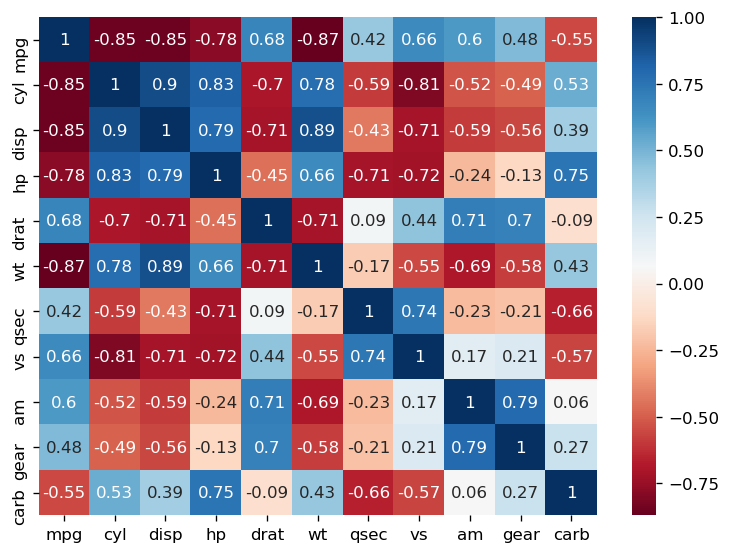

In [17]:
# 히트맵 만들기 
sns.heatmap(car_cor,
            annot = True, # 상관계수 표시
           cmap = 'RdBu') # 컬러맵

**3. 대각 행렬 제거하기** 

`sns.heatmap()`의 `mask`를 이용해 중복된 부분을 제거하겠습니다.

**3.1. mask만들기**

`np.zeros_like()`를 이용해 상관행렬의 행과 열의 수 만큼 0으로 채운 배열을 만듭니다. 

In [18]:
# mask 만들기
import numpy as np 
mask = np.zeros_like(car_cor)
mask

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

배열의 오른쪽 위 인덱스를 구하는 `np.triu_indices_from()`을 활용해 `mask`의 오른쪽 위 대각 행렬을 1로 바꿉니다. 

In [20]:
# 오른쪽 위 대각 행렬을 1로 바꾸기 
mask[np.triu_indices_from(mask)] = 1 
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

**3.2 히트맵에 mask 적용하기**

<AxesSubplot:>

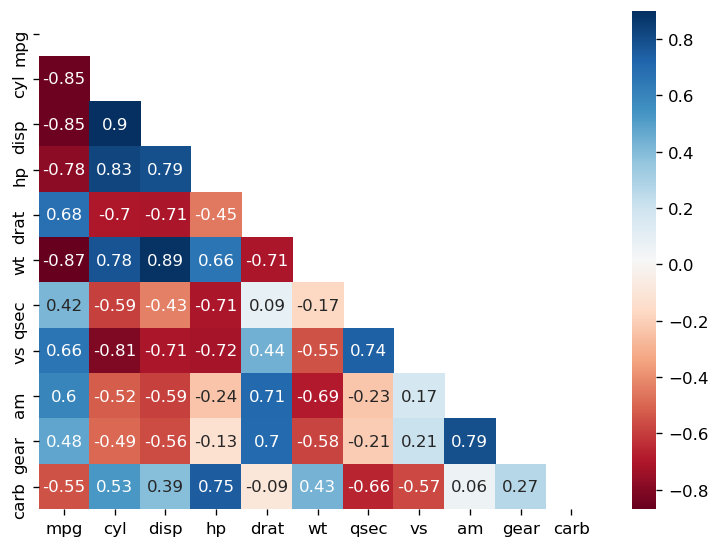

In [21]:
# 히트맵 만들기
sns.heatmap(data = car_cor,
           annot = True, # 상관계수 표시
           cmap = 'RdBu',# 컬러맵
           mask = mask) # mask 적용

**3.3. 빈 행과 열 제거하기**

왼쪽 위 `mpg`행과 오른쪽 `carb`열에는 아무 값도 표현되지 않았습니다. 행과 열의 변수가 같아서 상관계수가 항상 1이 되는 위치이므로 값을 표기하지 않은 것입니다. 히트맵의 빈 행과 열을 제거하려면 `mask`와 상관행렬의 첫 번째 행과 마지막 열을 제거한 다음 히트맵을 만들면 됩니다. 

<AxesSubplot:>

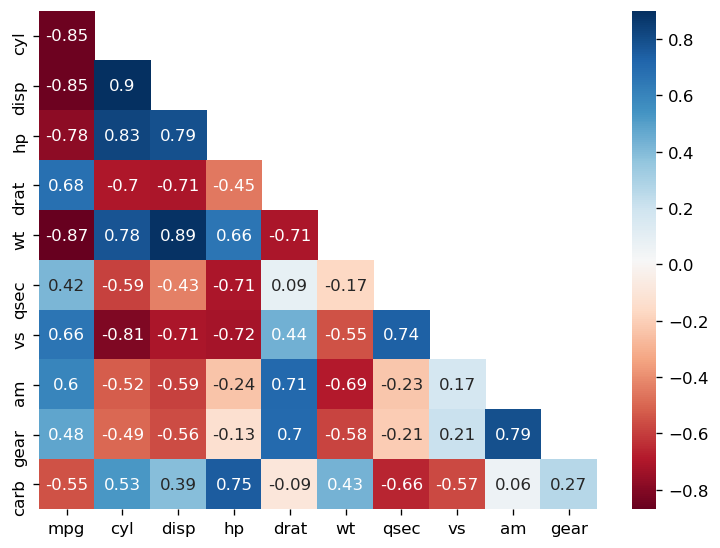

In [23]:
mask_new = mask[1:,:-1] # mask의 첫 번째 행, 마지막 열 제거 
cor_new = car_cor.iloc[1:,:-1] # 상관행렬 첫 번째 행, 마지막 열 제거 

# 히트맵 만들기
sns.heatmap(data = cor_new,
            annot = True,
           cmap = 'RdBu',
           mask= mask_new)

<AxesSubplot:>

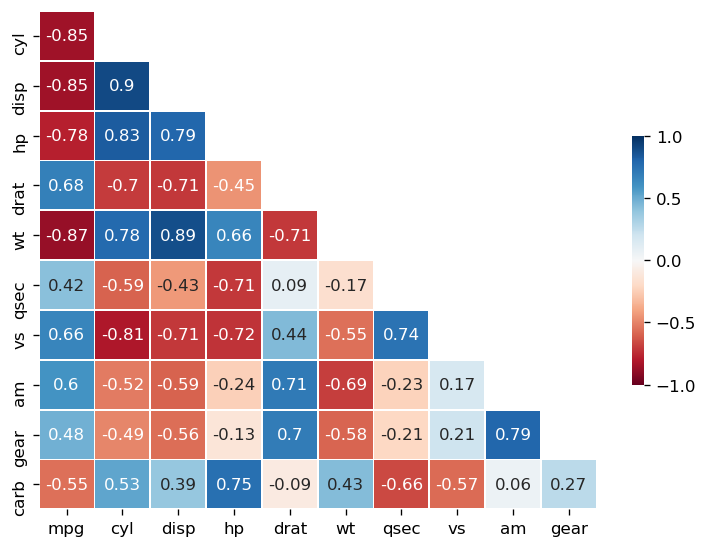

In [25]:
# 히트맵 만들기 -- 파라미터 몇 가지를 추가해서 
sns.heatmap(data = cor_new,
            annot = True,
           cmap = 'RdBu',
           mask = mask_new,
           linewidths = .5,          # 경계 구분선 추가
           vmax = 1,                # 가장 진한 파란색으로 표현할 최대값
           vmin = -1,               # 가장 진한 빨간색으로 표현할 최소값
           cbar_kws = {"shrink":.5}) # 범례 크기 줄이기